# Spot A Difference? -- A Guide for Business Decision-Makers

In [26]:
# Import required libraries
import os
import multiprocessing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mlarena.utils.plot_utils import plot_box_scatter
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducible results
np.random.seed(42)

# Configure plotting
colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]
MPL_BLUE = colors[0]  # Main distribution/points color
MPL_RED = colors[3]  # Highlight influential points
MPL_YELLOW = colors[1]  # Highlight influential points
MPL_GREEN = colors[2]  # Highlight influential points

# Configure parallel processing
# Only needed when running locally (not required on distributed platforms like Databricks)
n_cores = multiprocessing.cpu_count()
n_jobs = max(1, n_cores // 2)  # Use half of available cores to avoid overloading
os.environ["LOKY_MAX_CPU_COUNT"] = str(n_jobs)

# A Mean Difference Discovered

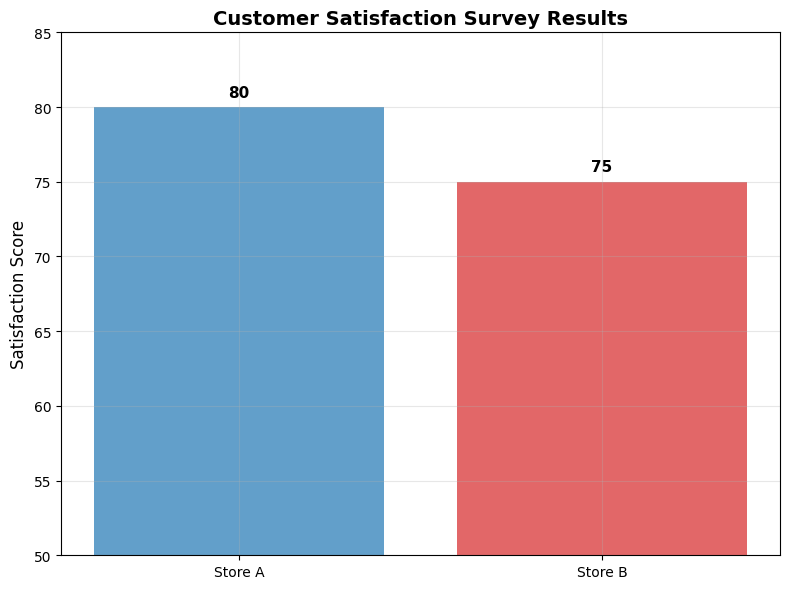

📊 Typical executive presentation: Store A appears to outperform Store B.
💭 Initial reaction: 'Store B clearly needs intervention'
⚠️  But wait... this chart only shows averages. What's the full story?


In [167]:
# Create the typical executive presentation: a bar chart
fig, ax = plt.subplots(figsize=(8, 6))

teams = ['Store A', 'Store B']
satisfaction_means = [80, 75]

# Create dramatic-looking bar chart with narrow y-axis range
bars = ax.bar(teams, satisfaction_means, color=[MPL_BLUE, MPL_RED], alpha=0.7)
ax.set_ylim(50, 85)  # Narrow range makes difference look dramatic
ax.set_ylabel('Satisfaction Score', fontsize=12)
ax.set_title('Customer Satisfaction Survey Results', fontsize=14, fontweight='bold')
# Add value labels on bars
for bar, value in zip(bars, satisfaction_means):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.5, f'{value}',
            ha='center', va='bottom', fontsize=11, fontweight='bold')
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("📊 Typical executive presentation: Store A appears to outperform Store B.")
print("💭 Initial reaction: 'Store B clearly needs intervention'")
print("⚠️  But wait... this chart only shows averages. What's the full story?")

### The Problem with Bar Charts

**Bar charts only show averages - they hide the complete story.**

Before making costly organizational decisions based on a mean difference, we need to understand:
- How much variation exists within each team?
- How confident can we be that this difference is real?
- Is this difference large enough to justify intervention costs?

**Key Takeaway**: Before making costly decisions, we need to see the complete picture.

---

# What the Bar Chart Hides - The Rest of the Story

The same 5-point mean difference can represent completely different business realities. Let's examine three scenarios that would all produce **identical bar charts** but require **completely different business decisions**.

## Same Bar Chart: Three Different Scenarios

In [153]:
# Generate three different scenarios with identical means but different statistical stories

# Scenario A: Small sample, small variance
np.random.seed(123)
store_a_scenario_a = np.random.normal(80, 10, 50)  
store_b_scenario_a = np.random.normal(75, 10, 50)  
scenario_a = pd.DataFrame({
    'store': ['Store A'] * 50 + ['Store B'] * 50,
    'satisfaction': np.concatenate([store_a_scenario_a, store_b_scenario_a])
})

# Scenario B: Small sample, large variance (noisy signal) 
np.random.seed(48)
store_a_scenario_b = np.random.normal(80, 20, 50)  
store_b_scenario_b = np.random.normal(75, 20, 50)  
scenario_b = pd.DataFrame({
    'store': ['Store A'] * 50 + ['Store B'] * 50,
    'satisfaction': np.concatenate([store_a_scenario_b, store_b_scenario_b])
})

# Scenario C: Large sample, same large variance as B (more power)
np.random.seed(20)
store_a_scenario_c = np.random.normal(80, 20, 500)  
store_b_scenario_c = np.random.normal(75, 20, 500)  
scenario_c = pd.DataFrame({
    'store': ['Store A'] * 500 + ['Store B'] * 500,
    'satisfaction': np.concatenate([store_a_scenario_c, store_b_scenario_c])
})

print("📋 Generated three scenarios:")
mean_a_a = scenario_a[scenario_a['store'] == 'Store A']['satisfaction'].mean()
mean_b_a = scenario_a[scenario_a['store'] == 'Store B']['satisfaction'].mean()
mean_a_b = scenario_b[scenario_b['store'] == 'Store A']['satisfaction'].mean()
mean_b_b = scenario_b[scenario_b['store'] == 'Store B']['satisfaction'].mean()
mean_a_c = scenario_c[scenario_c['store'] == 'Store A']['satisfaction'].mean()
mean_b_c = scenario_c[scenario_c['store'] == 'Store B']['satisfaction'].mean()
print(f"Scenario A: {len(scenario_a)//2} sample per store, low variance")
print(f"  Store A mean: {mean_a_a:.0f}")
print(f"  Store B mean: {mean_b_a:.0f}")
print(f"Scenario B: {len(scenario_b)//2} sample per store, high variance")
print(f"  Store A mean: {mean_a_b:.0f}")
print(f"  Store B mean: {mean_b_b:.0f}")
print(f"Scenario C: {len(scenario_c)//2} sample per store, high variance")
print(f"  Store A mean: {mean_a_c:.0f}")
print(f"  Store B mean: {mean_b_c:.0f}")
print("\n✅ All scenarios have the same 5-point mean difference")
print("❓ But do they tell the same business story?")


📋 Generated three scenarios:
Scenario A: 50 sample per store, low variance
  Store A mean: 80
  Store B mean: 75
Scenario B: 50 sample per store, high variance
  Store A mean: 80
  Store B mean: 75
Scenario C: 500 sample per store, high variance
  Store A mean: 80
  Store B mean: 75

✅ All scenarios have the same 5-point mean difference
❓ But do they tell the same business story?
